In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import yfinance as yf

In [ ]:
S= "ITC.NS"
stk = yf.Ticker(S)
df= stk.history(period="10y")
df.iloc[:,0:5].to_csv(S+".csv")

In [16]:
df= pd.read_csv(S+".csv",index_col="Date",parse_dates=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-10-25,89.023357,89.100432,86.633987,86.916855,10277516
2010-10-26,87.533456,89.074986,86.890639,88.252579,9176379
2010-10-27,88.252584,88.329659,85.914856,86.248596,7460368
2010-10-28,86.916848,88.227152,84.784143,85.837776,34655488
2010-10-29,86.890639,88.329655,85.144087,87.969711,27593872


In [17]:
df.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2462 entries, 2010-10-25 to 2020-10-23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2462 non-null   float64
 1   High    2462 non-null   float64
 2   Low     2462 non-null   float64
 3   Close   2462 non-null   float64
 4   Volume  2462 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 115.4 KB


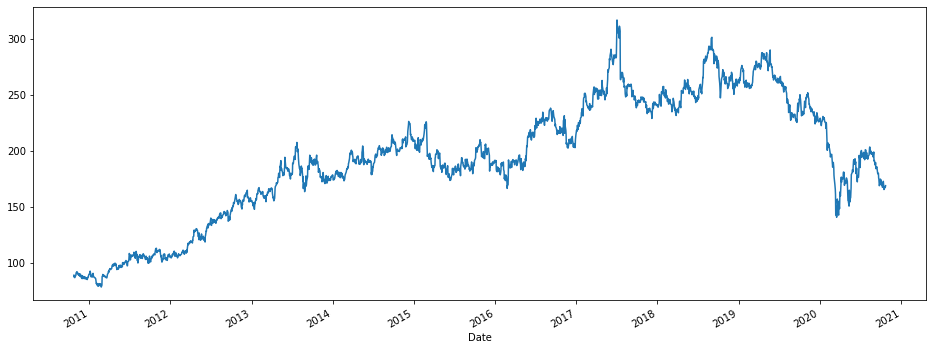

In [19]:
df['Open'].plot(figsize=(16,6))

In [20]:
df= df[['Open']]
training_df= df[:int(len(df)*(4/5))]
testing_df= df[int(len(df)*(4/5)):]

In [21]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_df = sc.fit_transform(training_df)
testing_df= sc.transform(testing_df)

# Training

In [22]:
X_train = []
y_train = []
for i in range(60, len(training_df)-4):
    X_train.append(training_df[i-60:i])
    y_train.append(training_df[i+4, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [23]:
X_train.shape

(1905, 60, 1)

In [24]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [25]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [26]:
# Initialising the RNN
regressor = Sequential()

In [27]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))


In [28]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1905/1905 [==============================] - 18s 10ms/step - loss: 0.0240
Epoch 2/100
1905/1905 [==============================] - 15s 8ms/step - loss: 0.0049
Epoch 3/100
1905/1905 [==============================] - 15s 8ms/step - loss: 0.0043
Epoch 4/100
1905/1905 [==============================] - 15s 8ms/step - loss: 0.0040
Epoch 5/100
1905/1905 [==============================] - 15s 8ms/step - loss: 0.0038
Epoch 6/100
1905/1905 [==============================] - 15s 8ms/step - loss: 0.0043
Epoch 7/100
1905/1905 [==============================] - 15s 8ms/step - loss: 0.0040
Epoch 8/100
1905/1905 [==============================] - 15s 8ms/step - loss: 0.0033
Epoch 9/100
1905/1905 [==============================] - 15s 8ms/step - loss: 0.0034
Epoch 10/100
1905/1905 [==============================] - 15s 8ms/step - loss: 0.0033
Epoch 11/100
1905/1905 [==============================] - 15s 8ms/step - loss: 0.0033
Epoch 12/100
1905/1905 [==============================] - 15s 

# Testing

In [29]:
X_test = []
y_test = []
for i in range(60, len(testing_df)-4):
    X_test.append(testing_df[i-60:i])
    y_test.append(testing_df[i+4, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [30]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [69]:
predicted_stock_price = regressor.predict(X_test)

In [70]:
y_test= np.reshape(y_test, (y_test.shape[0], 1))
y_test.shape

(429, 1)

In [66]:
y_test

array([[0.76426049],
       [0.76700099],
       [0.76269465],
       [0.74860115],
       [0.76739254],
       [0.75329896],
       [0.76954558],
       [0.77443911],
       [0.75662662],
       [0.74742672],
       [0.75877968],
       [0.7650436 ],
       [0.75055854],
       [0.7554521 ],
       [0.75525635],
       [0.76308608],
       [0.76230309],
       [0.74351187],
       [0.75623507],
       [0.75095004],
       [0.74977567],
       [0.74546938],
       [0.74723111],
       [0.75134161],
       [0.75643084],
       [0.75310331],
       [0.76700096],
       [0.78657513],
       [0.79323042],
       [0.80732386],
       [0.81789398],
       [0.8218088 ],
       [0.82572356],
       [0.82728947],
       [0.82944283],
       [0.81397912],
       [0.82415775],
       [0.8452978 ],
       [0.84529783],
       [0.83355327],
       [0.8257235 ],
       [0.82180872],
       [0.82220027],
       [0.83355331],
       [0.83511927],
       [0.83746814],
       [0.82963842],
       [0.825

In [71]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
actual_stock_price = sc.inverse_transform(y_test)

In [48]:
predicted_stock_price

array([[271.3801 ],
       [270.40298],
       [269.5436 ],
       [268.21805],
       [267.70212],
       [264.22693],
       [260.90286],
       [258.8582 ],
       [257.1698 ],
       [257.528  ],
       [257.76315],
       [258.86194],
       [260.4075 ],
       [260.18347],
       [258.51303],
       [257.7786 ],
       [258.36942],
       [258.22113],
       [258.0004 ],
       [257.90338],
       [258.47388],
       [259.0758 ],
       [258.0051 ],
       [257.43832],
       [257.09497],
       [256.8161 ],
       [256.32288],
       [256.01425],
       [256.21777],
       [256.9372 ],
       [257.3324 ],
       [258.38306],
       [260.8654 ],
       [263.52155],
       [266.15384],
       [268.53287],
       [270.11548],
       [270.9917 ],
       [271.35266],
       [271.5353 ],
       [270.36572],
       [269.86572],
       [271.66107],
       [273.7221 ],
       [273.90216],
       [272.57562],
       [270.99045],
       [270.07797],
       [270.75842],
       [271.9946 ],


In [75]:
actual_stock_price.shape

(429, 1)

In [72]:
predicted_stock_price.shape

(429, 1)

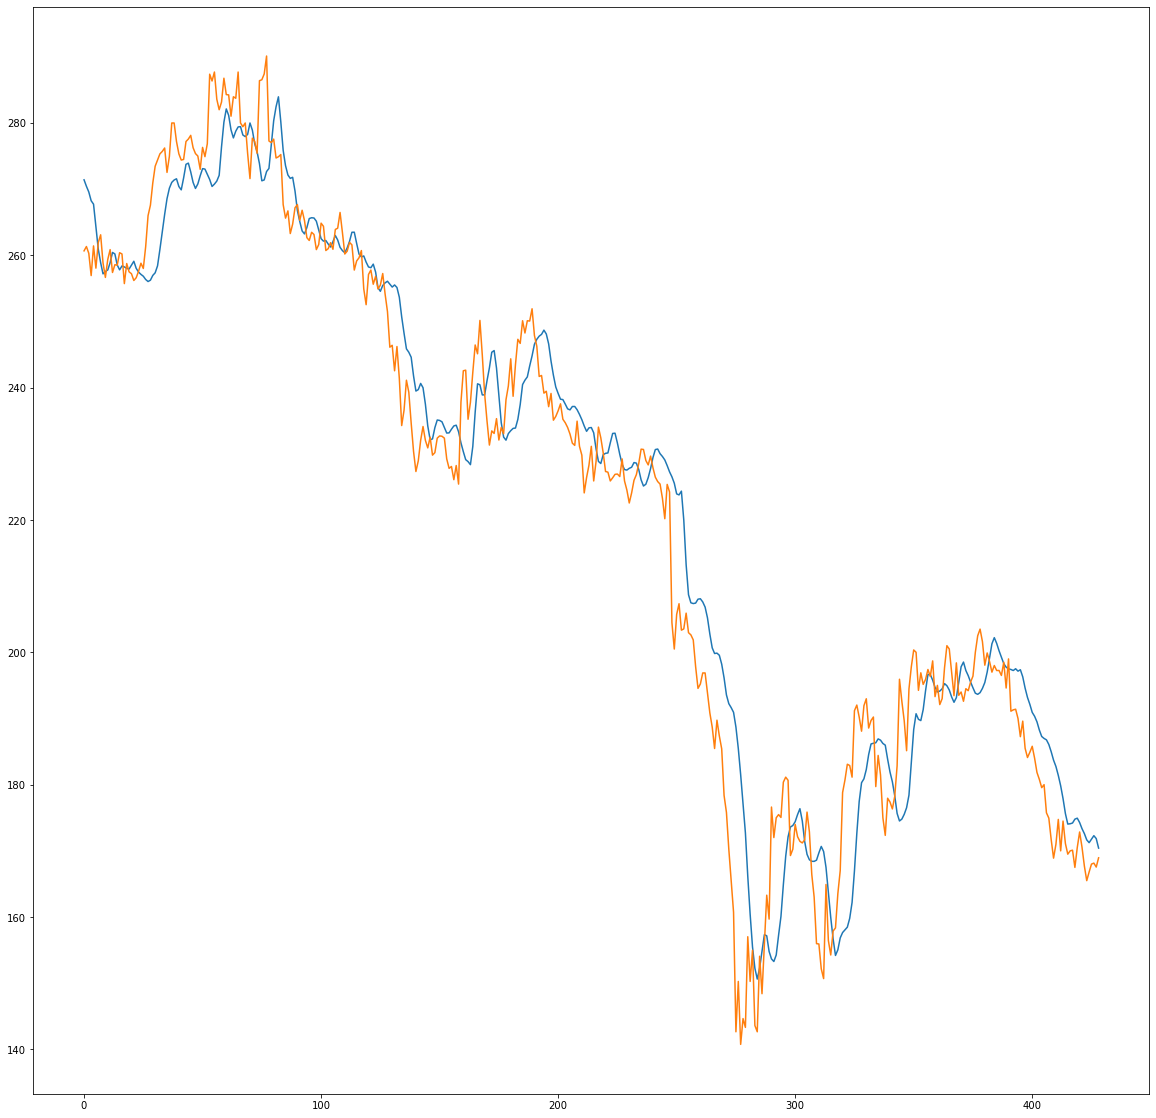

In [78]:
plt.figure(figsize=(20,20))
plt.plot(predicted_stock_price)
plt.plot(actual_stock_price)

In [80]:
pred_df=pd.DataFrame(predicted_stock_price)
act_df= pd.DataFrame(actual_stock_price)

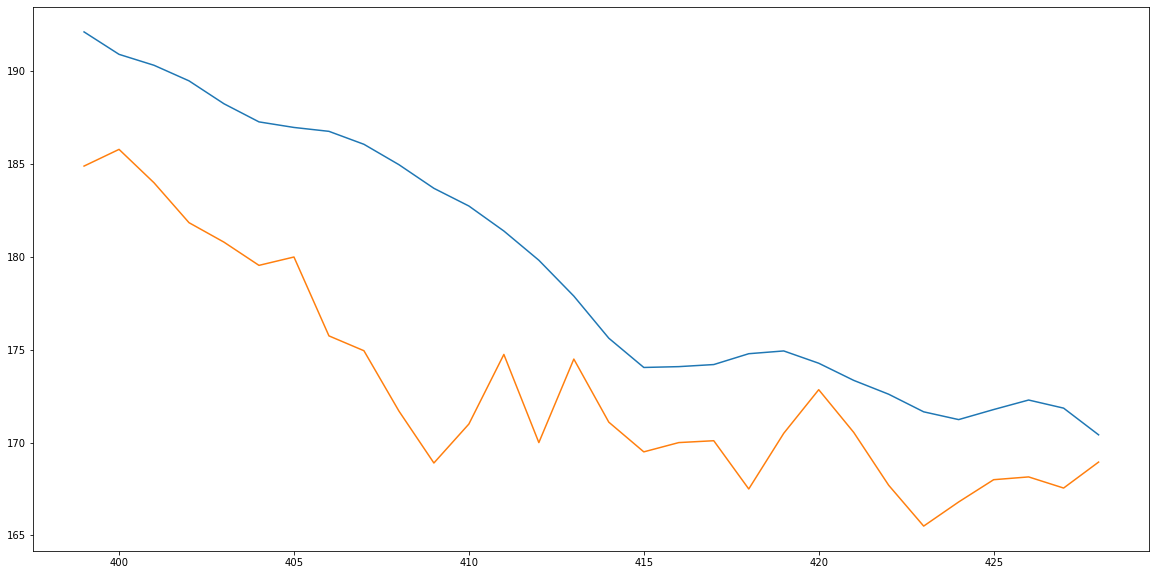

In [82]:
plt.figure(figsize=(20,10))
length= len(pred_df)
plt.plot(pred_df[length-30:])
plt.plot(act_df[length-30:])

In [83]:
import pickle
Pkl_Filename = "ITC_Model.pkl"  
sc_file= "ITC_sc.pkl"

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(regressor, file)
    
with open(sc_file, 'wb') as file:  
    pickle.dump(sc, file)